Dataset loaded successfully!
X shape: (12288, 785)
Y shape: (1, 785)
Training samples: 628
Testing samples: 157

Model Training Completed!
Training Accuracy: 90.45%
Testing Accuracy: 63.06%


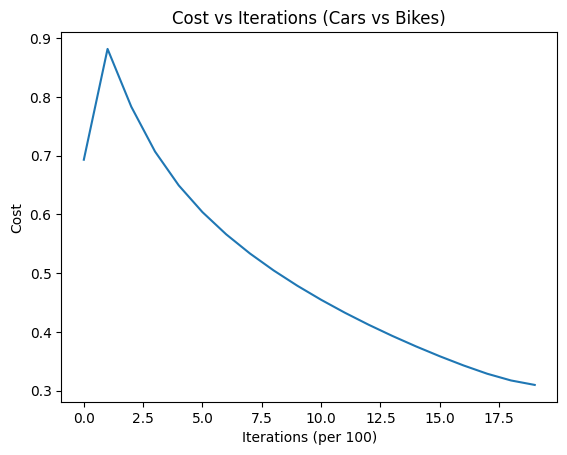

In [4]:

# 1. IMPORT LIBRARIES

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# 2. PARAMETERS

IMAGE_SIZE = 64         
DATASET_PATH = r"C:\Users\Guruprasad\Downloads\dataset"
LEARNING_RATE = 0.005
NUM_ITERATIONS = 2000


# 3. LOAD & PREPROCESS DATA


X = []
Y = []

#  Load Cars (label = 1) -----
cars_path = os.path.join(DATASET_PATH, "Cars")

for img_name in os.listdir(cars_path):
    img_path = os.path.join(cars_path, img_name)
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
    img = np.array(img) / 255.0
    X.append(img.flatten())
    Y.append(1)

# Load Bikes (label = 0) 
bikes_path = os.path.join(DATASET_PATH, "Bikes")

for img_name in os.listdir(bikes_path):
    img_path = os.path.join(bikes_path, img_name)
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
    img = np.array(img) / 255.0
    X.append(img.flatten())
    Y.append(0)

# Convert to numpy arrays
X = np.array(X).T         
Y = np.array(Y).reshape(1, -1)

print("Dataset loaded successfully!")
print("X shape:", X.shape)
print("Y shape:", Y.shape)


# 4. SHUFFLE & SPLIT DATA (80:20)


# Shuffle
indices = np.random.permutation(X.shape[1])
X = X[:, indices]
Y = Y[:, indices]

# 80:20 split
split = int(0.8 * X.shape[1])

X_train = X[:, :split]
X_test = X[:, split:]

Y_train = Y[:, :split]
Y_test = Y[:, split:]


print("Training samples:", X_train.shape[1])
print("Testing samples:", X_test.shape[1])


# 5. HELPER FUNCTIONS


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    cost = np.squeeze(cost)

    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        w -= learning_rate * grads["dw"]
        b -= learning_rate * grads["db"]

        if i % 100 == 0:
            costs.append(cost)

    params = {"w": w, "b": b}
    return params, costs


def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction


# 6. MODEL FUNCTION


def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w, b = initialize_with_zeros(X_train.shape[0])

    params, costs = optimize(
        w, b, X_train, Y_train,
        num_iterations, learning_rate
    )

    w = params["w"]
    b = params["b"]

    Y_pred_train = predict(w, b, X_train)
    Y_pred_test = predict(w, b, X_test)

    train_accuracy = 100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100

    print("\nModel Training Completed!")
    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}%")

    return costs, train_accuracy, test_accuracy



# 7. TRAIN MODEL


costs, train_acc, test_acc = model(
    X_train, Y_train,
    X_test, Y_test,
    NUM_ITERATIONS,
    LEARNING_RATE
)


# 8. PLOT COST vs ITERATIONS

plt.plot(costs)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Cars vs Bikes)")
plt.show()
